In [53]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [55]:
# load image
img = Image.open("../src/assets/noised-images-intro/astronaut/astronaut-1.jpg")
# resize image to height 256
img = img.resize((int(img.width * 512 / img.height), 512))
img = (np.array(img) / 255) * 2 - 1

total_steps = 1000
beta_min = 0.0001
beta_max = 0.02
variances = np.linspace(beta_min, beta_max, total_steps)
means = np.sqrt(1 - variances)

# progressively add noise, and save images every 50 steps
images = []
counter = 2
for i in range(total_steps):
    noise = np.random.normal(0, 1, img.shape)
    img = means[i] * img + variances[i] * noise
    if i % 50 == 0:
        img_to_save = Image.fromarray(((img + 1) * 255 / 2).astype(np.uint8))
        images.append(img_to_save)
        img_to_save.save(f"../src/assets/noised-images-intro/astronaut/astronaut-{counter}.jpg")
        counter += 1

In [69]:
# load lena image
img = Image.open("../src/assets/noised-images-intro/lena/lena-1.png")
# generate random noise of the same shape
noise = np.random.normal(0, 1, np.array(img).shape)
noise = (noise + 1) / 2 * 255
# save noise
img_to_save = Image.fromarray(noise.astype(np.uint8))
img_to_save.save("../src/assets/noised-images-intro/lena/lena-noise.png")

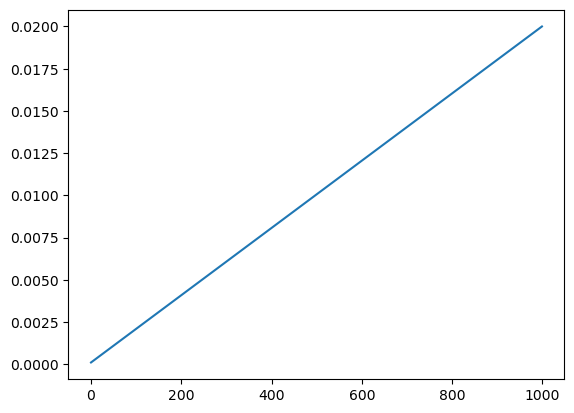

In [37]:
plt.plot(variances)

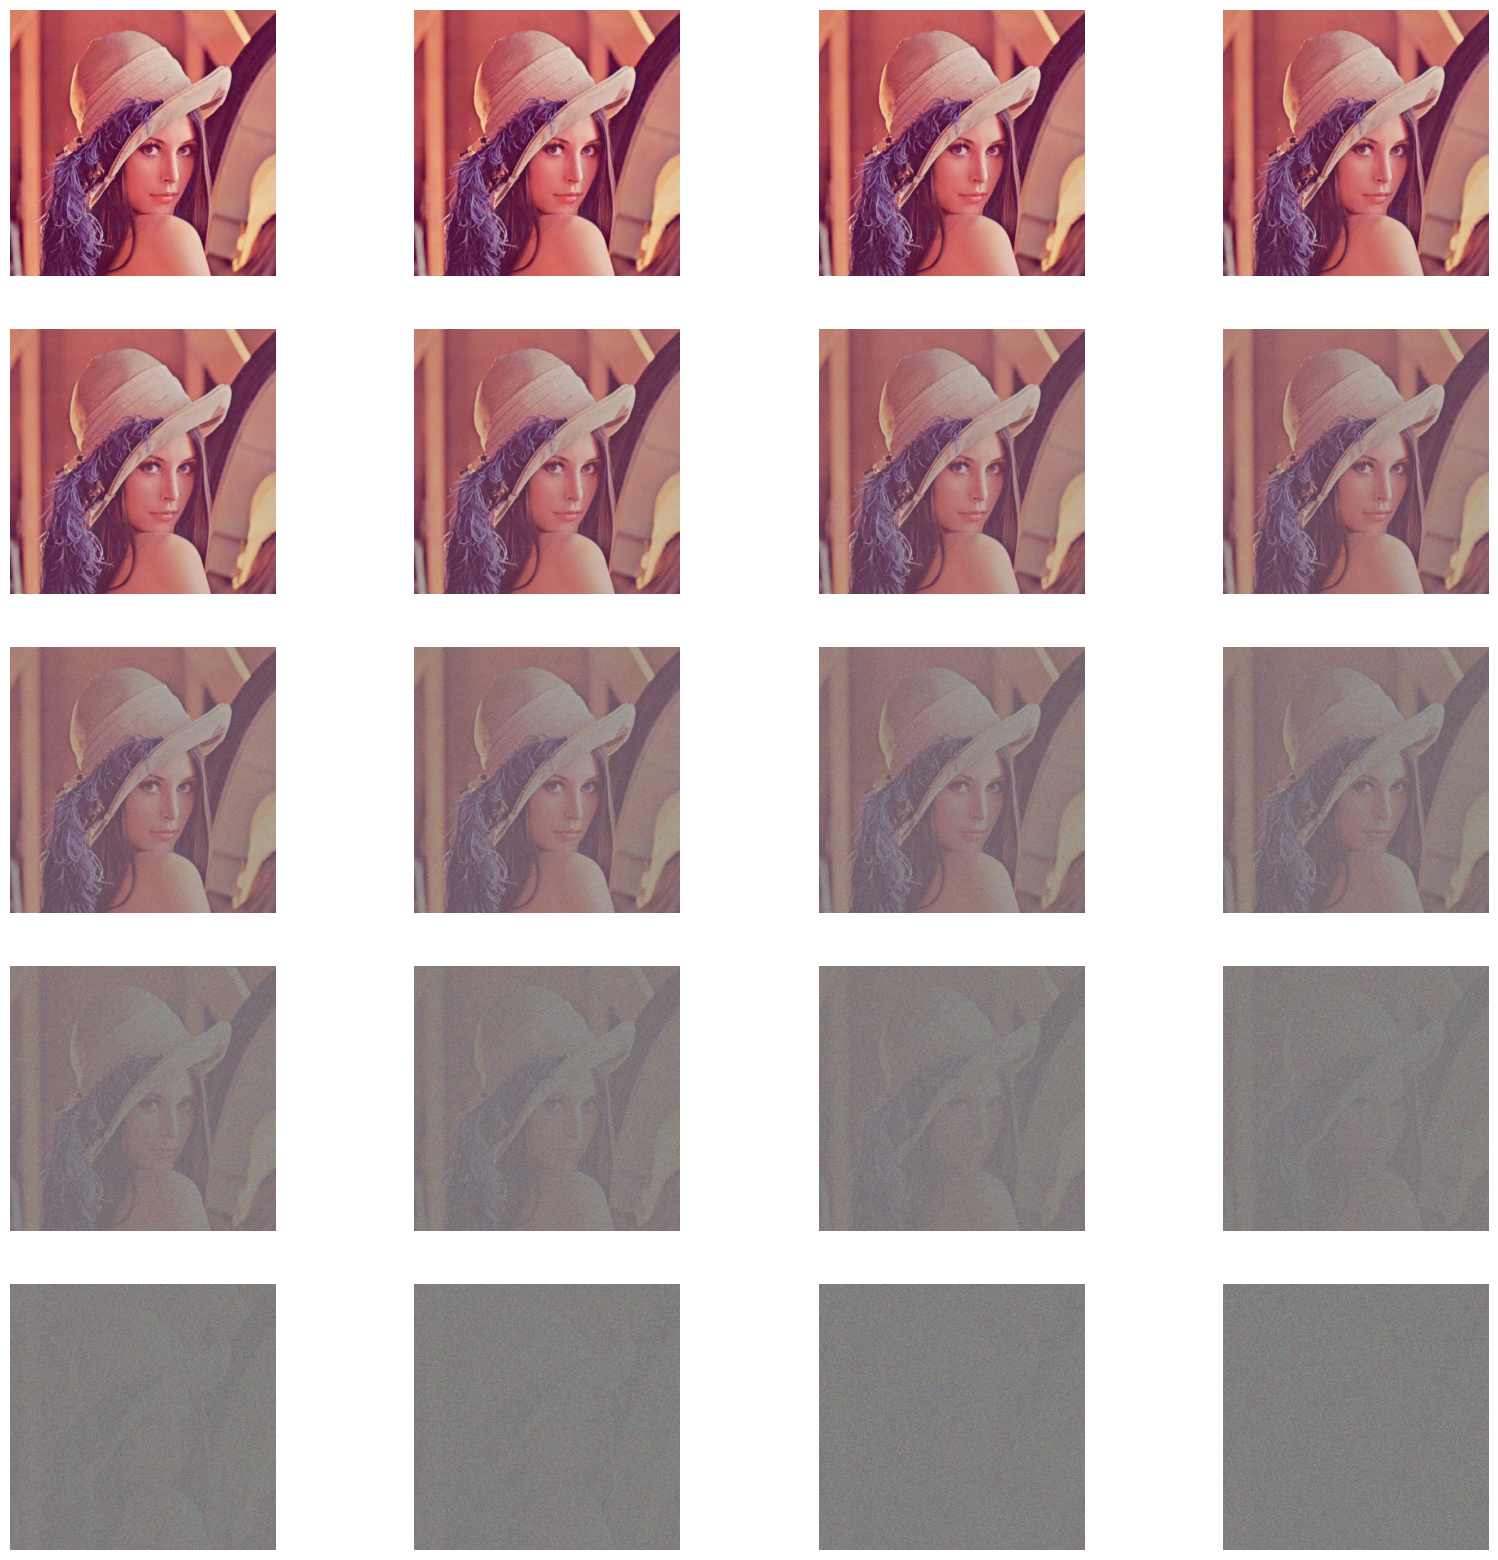

In [52]:
rows = len(images) // 4
fig, axs = plt.subplots(rows, 4, figsize=(20, 20))
for i, img in enumerate(images):
    axs[i // 4, i % 4].imshow(img)
    axs[i // 4, i % 4].axis("off")
plt.show()